<a href="https://colab.research.google.com/github/banty306/covid19-visualizer/blob/master/main_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://api.covid19india.org/states_daily.json'


In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url, 'data.json');

In [5]:
covid_data = pd.read_json('data.json')


In [ ]:
covid_data.describe

<bound method NDFrame.describe of                                           states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
487  {'an': '110', 'ap': '7449', 'ar': '69', 'as': ...
488  {'an': '1', 'ap': '93', 'ar': '0', 'as': '8', ...
489  {'an': '44', 'ap': '8601', 'ar': '49', 'as': '...
490  {'an': '129', 'ap': '8741', 'ar': '130', 'as':...
491  {'an': '2', 'ap': '86', 'ar': '0', 'as': '10',...

[492 rows x 1 columns]>

In [ ]:
covid_data.head(5)

states_daily
0  {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1  {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2  {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3  {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4  {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...

In [6]:
import json

In [7]:
with open('data.json') as f:
    data = json.load(f)

In [8]:
data = data['states_daily']

In [9]:
covid_data = pd.json_normalize(data)

In [ ]:
covid_data

an    ap   ar    as    br   ch  ...   tr     tt un    up   ut    wb
0      0     1    0     0     0    0  ...    0     81  0    12    0     0
1      0     0    0     0     0    0  ...    0      9  0     4    0     0
2      0     0    0     0     0    0  ...    0      2  0     0    0     0
3      0     0    0     0     0    0  ...    0     27  0     1    0     0
4      0     0    0     0     0    0  ...    0      4  0     0    0     0
..   ...   ...  ...   ...   ...  ...  ...  ...    ... ..   ...  ...   ...
487  110  7449   69  3259  3082   21  ...  121  56896  0  4318  459  3048
488    1    93    0     8     9    4  ...    2    846  0    59    5    57
489   44  8601   49  1879  1227  117  ...  200  59696  0  4601  405  2967
490  129  8741  130  2190  2908  154  ...  159  66305  0  4494  432  3285
491    2    86    0    10    17    0  ...    1    854  0    61    7    57

[492 rows x 41 columns]

In [10]:
df = covid_data

In [11]:
df.date = pd.to_datetime(df.date)

In [12]:
df.set_index('date', inplace=True)

In [13]:
df.head(2)

an ap ar as br ch ct dd dl  ...     status tg tn tr  tt un  up ut wb
date                                   ...                                     
2020-03-14  0  1  0  0  0  0  0  0  7  ...  Confirmed  1  1  0  81  0  12  0  0
2020-03-14  0  0  0  0  0  0  0  0  1  ...  Recovered  0  0  0   9  0   4  0  0

[2 rows x 40 columns]

In [15]:
recv = df[df.status == 'Recovered']

In [16]:
recv

an    ap   ar    as    br   ch  ...   tr     tt un    up   ut    wb
date                                         ...                                
2020-03-14    0     0    0     0     0    0  ...    0      9  0     4    0     0
2020-03-15    0     0    0     0     0    0  ...    0      4  0     0    0     0
2020-03-16    0     0    0     0     0    0  ...    0      1  0     0    0     0
2020-03-17    0     0    0     0     0    0  ...    0      1  0     1    0     0
2020-03-18    0     0    0     0     0    0  ...    0      0  0     0    0     0
...         ...   ...  ...   ...   ...  ...  ...  ...    ... ..   ...  ...   ...
2020-08-21  106  8827   32  2476  3678   36  ...   86  62858  0  5567  243  3082
2020-08-22  109  8593  103  2045  3531   45  ...  410  59101  0  4638  345  3088
2020-08-23  110  7449   69  3259  3082   21  ...  121  56896  0  4318  459  3048
2020-08-24  129  8741  130  2190  2908  154  ...  159  66305  0  4494  432  3285
2020-08-25  139  9419   81  1724  3169   67  ...   73  64151  0  4647  289  3251

[165 rows x 40 columns]

In [17]:
recv.drop('status', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
recv.drop('un', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
recv.head(1)

an ap ar as br ch ct dd dl dn ga  ... pb py rj sk tg tn tr tt up ut wb
date                                         ...                                 
2020-03-14  0  0  0  0  0  0  0  0  1  0  0  ...  0  0  1  0  0  0  0  9  4  0  0

[1 rows x 38 columns]

In [20]:
recv = recv.apply(pd.to_numeric)

In [21]:
recv.style

In [ ]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

In [ ]:
recv.style.highlight_max(color='red')

In [ ]:
recv.style.bar()

In [ ]:
recv.style.background_gradient(cmap='Reds')

In [27]:
monthly_recv =recv.resample('M').sum()

In [30]:
monthly_recv.style.background_gradient(cmap='Greens')

In [39]:
df2 = pd.DataFrame(monthly_recv, columns=['an', 	'ap', 	'ar', 	'as',	'br',	'ch',	'ct',	'dd'])

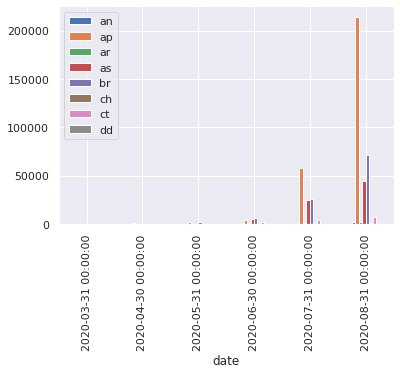

In [42]:
df2.plot.bar()